In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

Load data

In [2]:
# Load data from the CSV file into a new DataFrame
data = pd.read_csv('../model/gps_data.csv')
data

,Person ID,Latitude,Longitude,0,Altitude,NumDays,Date,Time
0,0,39.984702,116.318417,0,492.000000,39744.120185,2008-10-23,02:53:04
1,0,39.984683,116.318450,0,492.000000,39744.120255,2008-10-23,02:53:10
2,0,39.984686,116.318417,0,492.000000,39744.120313,2008-10-23,02:53:15
3,0,39.984688,116.318385,0,492.000000,39744.120370,2008-10-23,02:53:20
4,0,39.984655,116.318263,0,492.000000,39744.120428,2008-10-23,02:53:25
...,...,...,...,...,...,...,...,...
19994530,18668,39.988783,116.299000,0,114.829396,39495.446632,2008-02-17,10:43:09
19994531,18668,39.989500,116.298667,0,98.425197,39495.447176,2008-02-17,10:43:56
19994532,18668,39.990067,116.298350,0,131.233596,39495.447523,2008-02-17,10:44:26
19994533,18668,39.989517,116.298417,0,150.918635,39495.448183,2008-02-17,10:45:23


Load transportation data

In [3]:
# Load data from the CSV file into a new DataFrame
data_labels = pd.read_csv('../model/labels_data.csv')
data_labels

,Start Time,End Time,Transportation Mode
0,2007/06/26 11:32:29,2007/06/26 11:40:29,bus
1,2008/03/28 14:52:54,2008/03/28 15:59:59,train
2,2008/03/28 16:00:00,2008/03/28 22:02:00,train
3,2008/03/29 01:27:50,2008/03/29 15:59:59,train
4,2008/03/29 16:00:00,2008/03/30 15:59:59,train
...,...,...,...
14713,2008/11/17 06:59:58,2008/11/17 07:06:16,bus
14714,2008/11/17 07:06:16,2008/11/17 07:14:32,walk
14715,2008/11/29 01:58:05,2008/11/29 02:01:39,bus
14716,2008/11/29 02:01:39,2008/11/29 02:07:57,walk


Distribution of transportation nodes

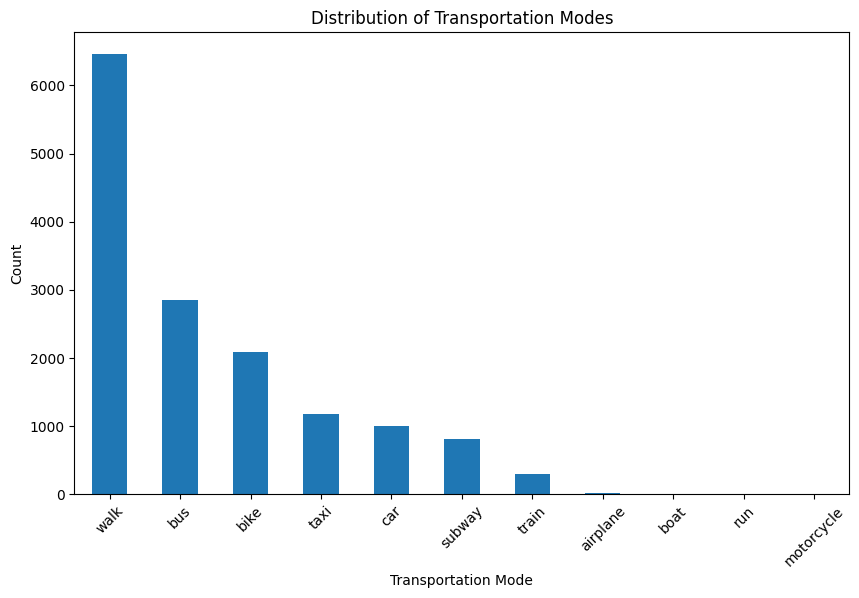

In [4]:
x = data_labels['Transportation Mode'].value_counts()

# Create a bar chart
plt.figure(figsize=(10, 6))
x.plot(kind='bar')
plt.xlabel('Transportation Mode')
plt.ylabel('Count')
plt.title('Distribution of Transportation Modes')
plt.xticks(rotation=45)
plt.show()

Heatmap GPS density

In [5]:
import plotly.express as px

n_samples = 20000
gps_data = pd.read_csv('../model/gps_data.csv').sample(n=n_samples)

# Create a heatmap with Plotly
fig = px.density_mapbox(
	gps_data, 
	lat='Latitude', 
	lon='Longitude', 
	radius=10,
	center=dict(lat=gps_data['Latitude'].mean(), lon=gps_data['Longitude'].mean()),  # Center the map on the data
	zoom=10,  # Adjust the zoom level as needed
)
fig.update_layout(mapbox_style="open-street-map")
fig.show()


Clusterring data

In [6]:
n_samples = 50000
data2 = pd.read_csv('../model/gps_data.csv').sample(n=n_samples)

# Create a K-Means modelpip i
kmeans = KMeans(n_clusters=5)  # Specify the number of clusters (adjust as needed)

# Fit the model to your GPS data
kmeans.fit(data2[['Latitude', 'Longitude']])  # Use the Latitude and Longitude columns

# Get cluster labels for each data point
cluster_labels = kmeans.labels_

# Add the cluster labels to your DataFrame
data2['Cluster'] = cluster_labels


c:\Users\janhr\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [7]:
import folium

# Create a map centered at the mean latitude and longitude
m = folium.Map(location=[data2['Latitude'].mean(), data2['Longitude'].mean()], zoom_start=10)

cluster_color = ['blue', 'red', 'yellow', 'pink', 'black']

for cluster in data2['Cluster'].unique():
	cluster_data = data2[data2['Cluster'] == cluster]
	for index, row in cluster_data.iterrows():
		folium.CircleMarker(location=[row['Latitude'], row['Longitude']], radius=5, color=f'{cluster_color[cluster]}').add_to(m)

m.save('../files/cluster_map.html')

Animation

In [8]:
# gps_data = data.head(1000)

# gps_data['Time'] = pd.to_datetime(gps_data['Time'])

# gps_data['TimeStr'] = gps_data['Time'].dt.strftime('%Y-%m-%d %H:%M:%S')

# # Create an animated scatter plot
# fig = px.scatter_geo(
#     gps_data,
#     lat='Latitude',
#     lon='Longitude',
#     animation_frame='TimeStr',
#     title='GPS Data Animation',
#     scope='asia',
# )

# fig.update_geos(center=dict(lon=116.4, lat=39.9))

# fig.update_geos(projection_scale=15)

# fig.show()

Remove date, time and num days and replace them with timestamp

In [3]:
data['Timestamp'] = pd.to_datetime(data['Date'] + ' ' + data['Time'])

# Drop the 'NumDays', 'Date', and 'Time' columns
data = data.drop(columns=['NumDays', 'Date', 'Time'])

In [4]:
data

,Person ID,Latitude,Longitude,0,Altitude,Timestamp
0,0,39.984702,116.318417,0,492.000000,2008-10-23 02:53:04
1,0,39.984683,116.318450,0,492.000000,2008-10-23 02:53:10
2,0,39.984686,116.318417,0,492.000000,2008-10-23 02:53:15
3,0,39.984688,116.318385,0,492.000000,2008-10-23 02:53:20
4,0,39.984655,116.318263,0,492.000000,2008-10-23 02:53:25
...,...,...,...,...,...,...
19994530,18668,39.988783,116.299000,0,114.829396,2008-02-17 10:43:09
19994531,18668,39.989500,116.298667,0,98.425197,2008-02-17 10:43:56
19994532,18668,39.990067,116.298350,0,131.233596,2008-02-17 10:44:26
19994533,18668,39.989517,116.298417,0,150.918635,2008-02-17 10:45:23


Save data

In [5]:
# Save DataFrame to a CSV file
data.to_csv('../model/gps_data_geolife.csv', index=False)